<a href="https://colab.research.google.com/github/Piyush-47928/CHATBOT-NAMED-FRIDAY/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nn = Neural network, nn.func = move forward


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower)
  def __init__ (self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
#Pick a mannual seed for randomization
torch.manual_seed(32)
#Create an instance of the model
model = Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_df['species'] = my_df['species'].replace({'virginica':2.0,'versicolor':1.0,'setosa':0.0})
my_df

/tmp/ipython-input-1472655807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'virginica':2.0,'versicolor':1.0,'setosa':0.0})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
my_df['species'] = my_df['species'].replace({'Virginica':2.0,'Versicolor':1.0,'Setosa':0.0})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train test split! Set X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
#Convert x and y features to float tensors and long tensors respectively
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations (epochs)., lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Train our model
#Epoch? (one run through all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  #Go forward and get a prediction
  y_pred = model.forward(X_train)#get prediction

  #Measure the loss/error
  loss = criterion(y_pred,y_train)

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #Do some back propogation: take the error rate of forward propogation and feed it back through network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.169895887374878
Epoch: 10 Loss: 0.9578844308853149
Epoch: 20 Loss: 0.7988812923431396
Epoch: 30 Loss: 0.634953498840332
Epoch: 40 Loss: 0.44043001532554626
Epoch: 50 Loss: 0.291716992855072
Epoch: 60 Loss: 0.17829042673110962
Epoch: 70 Loss: 0.11587586998939514
Epoch: 80 Loss: 0.08928147703409195
Epoch: 90 Loss: 0.07743765413761139
Epoch: 100 Loss: 0.07124082744121552
Epoch: 110 Loss: 0.06744465976953506
Epoch: 120 Loss: 0.06482169777154922
Epoch: 130 Loss: 0.06285709887742996
Epoch: 140 Loss: 0.06129826232790947
Epoch: 150 Loss: 0.06000852212309837
Epoch: 160 Loss: 0.058905504643917084
Epoch: 170 Loss: 0.057936906814575195
Epoch: 180 Loss: 0.057068951427936554
Epoch: 190 Loss: 0.056279949843883514


Text(0.5, 0, 'Epoch')

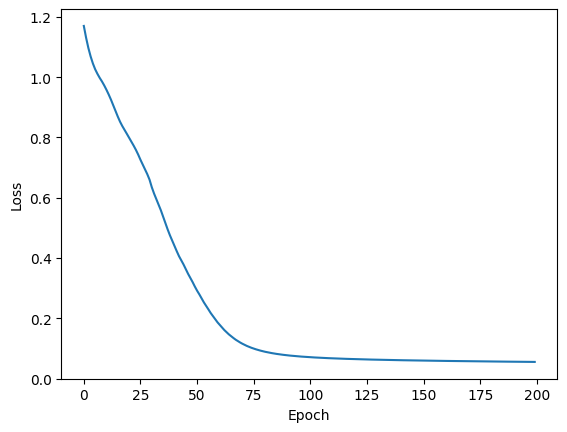

In [ ]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate model on Test data set (validate model on test set)
with torch.no_grad():    #Basically turn off the back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [ ]:
loss

tensor(0.0298)

In [ ]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] ==0:
      x = "Setosa"
    elif y_test[i] ==1:
      x = "Versicolor"
    else:
      x = "Virginica"

    #Will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct out of {len(y_test)}')
print(f'Our accuracy is {round(correct/len(y_test),3)}')

1.) tensor([-4.5474,  5.6474,  0.6258]) 	 1 	 1
2.) tensor([  9.7839,   2.0130, -14.4508]) 	 0 	 0
3.) tensor([  8.7851,   2.2439, -13.3628]) 	 0 	 0
4.) tensor([-4.7777,  5.9443,  0.5937]) 	 1 	 1
5.) tensor([-9.7693,  3.8727,  7.0655]) 	 2 	 2
6.) tensor([-10.4429,   5.0144,   6.8463]) 	 2 	 2
7.) tensor([  8.1658,   2.5038, -12.7315]) 	 0 	 0
8.) tensor([  9.2193,   2.0836, -13.7833]) 	 0 	 0
9.) tensor([-4.0243,  5.9801, -0.2057]) 	 1 	 1
10.) tensor([  9.5090,   2.0918, -14.1647]) 	 0 	 0
11.) tensor([-4.9568,  6.4096,  0.5537]) 	 1 	 1
12.) tensor([-11.6292,   2.6205,   9.6212]) 	 2 	 2
13.) tensor([-2.2209,  5.4773, -1.5542]) 	 1 	 1
14.) tensor([-1.4594,  6.1748, -2.9049]) 	 1 	 1
15.) tensor([-9.9357,  3.6303,  7.3054]) 	 2 	 2
16.) tensor([-11.2093,   2.2251,   9.4723]) 	 2 	 2
17.) tensor([-5.2317,  5.1326,  1.6100]) 	 1 	 1
18.) tensor([-8.7368,  4.0250,  5.8872]) 	 2 	 2
19.) tensor([-2.0934,  5.9443, -2.0632]) 	 1 	 1
20.) tensor([ 10.2769,   2.1301, -15.1903]) 	 0 	 0
21

In [ ]:
new_iris = torch.tensor([5.6,3.7,2.2,2.0])

In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 2.6540,  4.6520, -6.6389])


In [ ]:
newer_iris = torch.tensor([5.6,3.0,2.1,2.0])

In [ ]:
with torch.no_grad():
  print(model(newer_iris))

tensor([ 1.2420,  4.8678, -5.0085])


In [ ]:
# Save ou NN Model
torch.save(model.state_dict(),'iris_model.pt')

In [ ]:
#Load the save model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)